In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, "../")

In [2]:
import numpy as np
from kernelbiome.kernels_jax import *
from kernelbiome.metrics_jax import *
from simplex_heatmap import draw_heatmap, draw_points
import matplotlib.pyplot as plt

/Users/hrt620/.pyenv/versions/3.9.9/envs/kb39/lib/python3.9/site-packages/jax/_src/lib/__init__.py:32: UserWarning: JAX on Mac ARM machines is experimental and minimally tested. Please see https://github.com/google/jax/issues/5501 in the event of problems.
  warnings.warn("JAX on Mac ARM machines is experimental and minimally tested. "


In [3]:
centre = np.repeat(1/3, 3)
corner_a = np.array([1.0, 0.0, 0.0])
corner_b = np.array([0.0, 1.0, 0.0])
corner_c = np.array([0.0, 0.0, 1.0])
mid_ab = np.array([1/2, 1/2, 0.0])
mid_bc = np.array([0.0, 1/2, 1/2])
mid_ac = np.array([1/2, 0.0, 1/2])
upper_inner = np.array([1/4, 1/4, 1/2])

In [4]:
from matplotlib import rc
rc('font', **{'family':'tex-gyre-termes', 'size':6.5})
rc('text', usetex=True)
rc('text.latex', preamble=r'\usepackage{amsmath}')

In [5]:
def save_plots(kernel_name, file_path, kernel_name_in_title=None, *args):
    
    d2_fun = eval('d2_' + kernel_name)
    k_fun = eval('k_' + kernel_name)
    kernel_name_in_title = kernel_name_in_title or ''

    # fig, axs = plt.subplots(1, 4, figsize=(16, 4))
    fig, axs = plt.subplots(1, 4)

    draw_heatmap(d2_fun, upper_inner, True, False, 50, 4, axs[0], *args)
    draw_points(upper_inner, fmt='kx', ax=axs[0])
    # axs[0].set_title(r'$d_{\text{' + kernel_name_in_title + '}}(x,z)$', y=0.1)
    axs[0].set_title(r'$d_{' + kernel_name_in_title + '}(x,z)$', y=-0.2) 

    draw_heatmap(k_fun, upper_inner, False, False, 50, 4, axs[1], *args)
    draw_points(upper_inner, fmt = 'kx', ax=axs[1])
    axs[1].set_title(r'$k_{' + kernel_name_in_title + '}(x,z)$', y=-0.2) 
    
    draw_heatmap(d2_fun, mid_ab, True, False, 50, 4, axs[2], *args)
    draw_points(mid_ab, fmt='kx', ax=axs[2])
    axs[2].set_title(r'$d_{' + kernel_name_in_title + '}(x,m)$', y=-0.2) 

    draw_heatmap(k_fun, mid_ab, False, False, 50, 4, axs[3], *args)
    draw_points(mid_ab, fmt = 'kx', ax=axs[3])
    axs[3].set_title(r'$k_{' + kernel_name_in_title + '}(x,m)$', y=-0.2) 
    
    fig.set_size_inches(6.5, 1.35)
    plt.savefig(file_path, bbox_inches='tight')
    # tikzplotlib.clean_figure()
    # tikzplotlib.save(filepath=file_path)

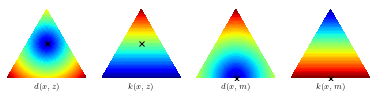

In [6]:
save_plots('linear', "output/linear.pdf")

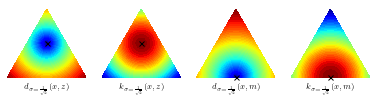

In [8]:
save_plots('rbf', "output/rbf_g_1.pdf", r'\sigma=\frac{1}{\sqrt{2}}', 1)

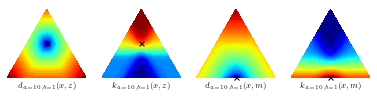

In [107]:
save_plots('hilbert1_ab', "output/hilbert1_a_10_b_1.pdf", r'a=10,b=1', 10, 1)

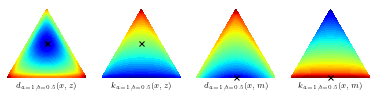

In [108]:
save_plots('hilbert1_ab', "output/hilbert1_a_1_b_0.5.pdf", r'a=1, b=0.5', 1, 0.5)

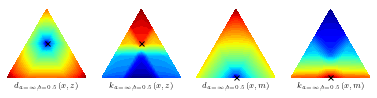

In [109]:
save_plots('hilbert1_a_inf_b_fin', "output/hilbert1_a_inf_b_0.5.pdf", r'a=\infty, b=0.5', 0.5)

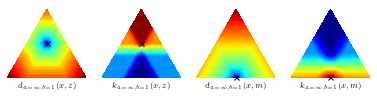

In [110]:
save_plots('hilbert1_a_inf_b_fin', "output/hilbert1_a_inf_b_1.pdf", r'a=\infty, b=1', 1)

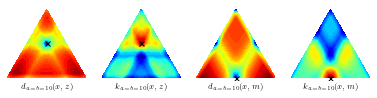

In [111]:
save_plots('hilbert1_b_fin', "output/hilbert1_b_10.pdf", r'a=b=10', 10)

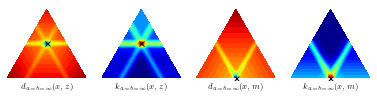

In [112]:
save_plots('hilbert1_b_inf', "../../writeup/hilbert1_b_inf.pdf", r'a=b=\infty')

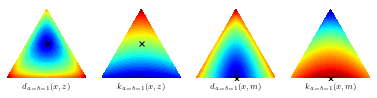

In [115]:
save_plots('hilbert1_b_fin', "output/hilbert1_b_1.pdf", r'a=b=1', 1)

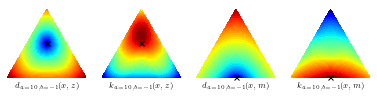

In [118]:
save_plots('hilbert2_ab', "../../writeup/hilbert2_a_10_b_-1.pdf", r'a=10, b=-1', 10, -1)

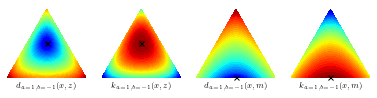

In [121]:
save_plots('hilbert2_ab', "output/hilbert2_a_1_b_-1.pdf", r'a=1, b=-1', 1, -1)

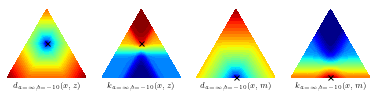

In [116]:
save_plots('hilbert2_a_inf_b_fin', "../../writeup/hilbert2_a_inf_b_-10.pdf", r'a=\infty, b=-10', -10)

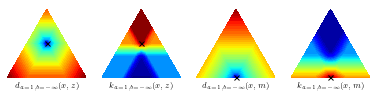

In [122]:
save_plots('hilbert2_a_fin_b_neginf', "output/hilbert2_a_1_b_-inf.pdf", r'a=1, b=-\infty', 1)

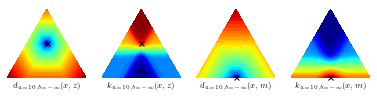

In [123]:
save_plots('hilbert2_a_fin_b_neginf', "../../writeup/hilbert2_a_10_b_-inf.pdf", r'a=10, b=-\infty', 10)

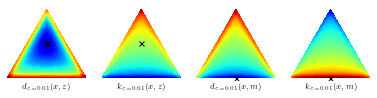

In [9]:
save_plots('aitchison', "output/aitchison_c_0.01.pdf", r'c=0.01', 0.01)

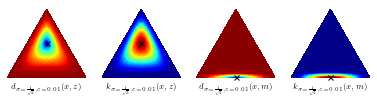

In [9]:
save_plots('aitchison_rbf', "../../writeup/aitchison_rbf_g_1_c_0.01.pdf", r'\sigma=\frac{1}{\sqrt{2}}, c=0.01', 1, 0.01)

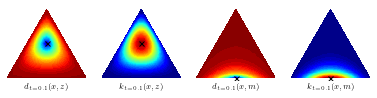

In [14]:
save_plots('hd', "output/hd_0.1.pdf", r't=0.1', 0.1)